<a href="https://colab.research.google.com/github/Serurays/Biomedical_Image_Analysis/blob/main/Biomedical_Image_Analysis_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "brain_0_volume.zip"

In [ ]:
import zipfile

with zipfile.ZipFile("brain_0_volume.zip", "r") as zip_ref:
  zip_ref.extractall("brain_0_volume")

In [ ]:
import imageio.v2 as imageio

img = imageio.imread("/content/brain_0_volume/IMG0080.dcm")

print("Type of the image:", type(img))

print("Shape of the image:", img.shape)

print("Meta Data of the Image:", img.meta.keys())

print("Imaging Modality:", img.meta["Modality"])

print("Patient Name:", img.meta["PatientName"])

print("Study Date:", img.meta["StudyDate"])

Type of the image: <class 'imageio.core.util.Array'>
Shape of the image: (240, 240)
Meta Data of the Image: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Imaging Modality: CT
Patient Name: Anonymous
Study Date: 20241222


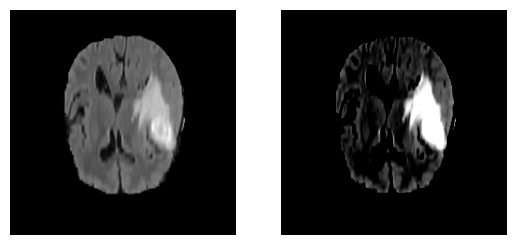

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(img, cmap="gray")
axes[1].imshow(img, vmin=500, vmax=1000, cmap="gray")

for ax in axes:
  ax.axis("off")

plt.show()

In [ ]:
import numpy as np

img1 = imageio.imread("/content/brain_0_volume/IMG0080.dcm")
img2 = imageio.imread("/content/brain_0_volume/IMG0081.dcm")
img3 = imageio.imread("/content/brain_0_volume/IMG0082.dcm")

vol = np.stack([img1, img2, img3])

print("Image shape:", img.shape)
print("Volume shape:", vol.shape)

Image shape: (240, 240)
Volume shape: (3, 240, 240)


In [ ]:
import os

os.listdir("brain_0_volume")

['IMG0122.dcm',
 'IMG0141.dcm',
 'IMG0143.dcm',
 'IMG0103.dcm',
 'IMG0108.dcm',
 'IMG0001.dcm',
 'IMG0079.dcm',
 'IMG0008.dcm',
 'IMG0015.dcm',
 'IMG0023.dcm',
 'IMG0061.dcm',
 'IMG0032.dcm',
 'IMG0012.dcm',
 'IMG0098.dcm',
 'IMG0018.dcm',
 'IMG0059.dcm',
 'IMG0007.dcm',
 'IMG0076.dcm',
 'IMG0024.dcm',
 'IMG0010.dcm',
 'IMG0071.dcm',
 'IMG0041.dcm',
 'IMG0153.dcm',
 'IMG0037.dcm',
 'IMG0005.dcm',
 'IMG0042.dcm',
 'IMG0003.dcm',
 'IMG0100.dcm',
 'IMG0055.dcm',
 'IMG0060.dcm',
 'IMG0094.dcm',
 'IMG0152.dcm',
 'IMG0131.dcm',
 'IMG0026.dcm',
 'IMG0155.dcm',
 'IMG0149.dcm',
 'IMG0150.dcm',
 'IMG0146.dcm',
 'IMG0030.dcm',
 'IMG0009.dcm',
 'IMG0137.dcm',
 'IMG0043.dcm',
 'IMG0028.dcm',
 'IMG0133.dcm',
 'IMG0112.dcm',
 'IMG0022.dcm',
 'IMG0077.dcm',
 'IMG0019.dcm',
 'IMG0113.dcm',
 'IMG0045.dcm',
 'IMG0106.dcm',
 'IMG0011.dcm',
 'IMG0063.dcm',
 'IMG0144.dcm',
 'IMG0074.dcm',
 'IMG0072.dcm',
 'IMG0140.dcm',
 'IMG0099.dcm',
 'IMG0107.dcm',
 'IMG0117.dcm',
 'IMG0020.dcm',
 'IMG0002.dcm',
 'IMG006

In [ ]:
vol = imageio.volread(uri="brain_0_volume", format="DICOM")

vol.shape

Reading DICOM (examining files): 1/155 files (0.6%)155/155 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 155/155  (100.0%)


(155, 240, 240)

In [ ]:
n0, n1, n2 = vol.shape
d0, d1, d2 = vol.meta["sampling"]
n0 * d0, n1 * d1, n2 * d2

(155.0, 240.0, 240.0)

In [ ]:
d0, d1, d2 = vol.meta["sampling"]
d0, d1, d2

(1.0, 1.0, 1.0)

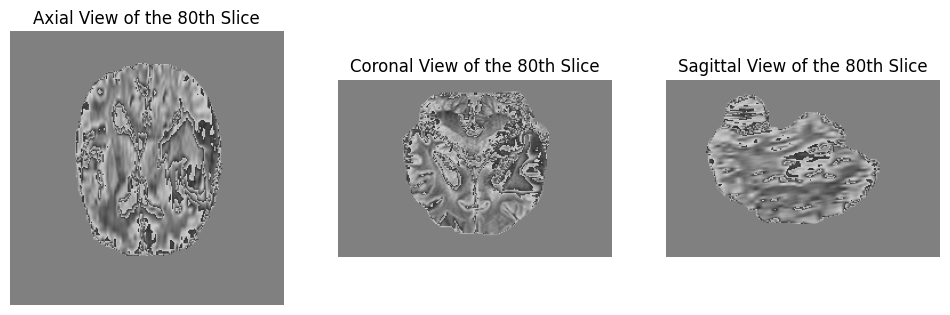

In [ ]:
view_axial = vol[80, :, :]
view_coronal = vol[:, 80, :]
view_sagittal = vol[:, :, 80]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axes[0].imshow(view_axial, cmap="gray", vmin=-200, vmax=200)
axes[0].set_title("Axial View of the 80th Slice")
axes[1].imshow(view_coronal, cmap="gray", vmin=-200, vmax=200)
axes[1].set_title("Coronal View of the 80th Slice")
axes[2].imshow(view_sagittal, cmap="gray", vmin=-200, vmax=200)
axes[2].set_title("Sagittal View of the 80th Slice")

for ax in axes:
  ax.axis("off")

plt.show()

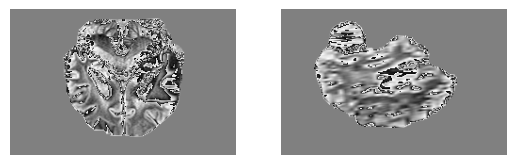

In [ ]:
img1 = vol[:, 80, :]
img2 = vol[:, :, 80]

d0, d1, d2 = vol.meta["sampling"]

asp1 = d0 / d2
asp2 = d0 / d1

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(img1, cmap="gray", aspect=asp1)
axes[1].imshow(img2, cmap="gray", aspect=asp2)

for ax in axes:
  ax.axis("off")

plt.show()

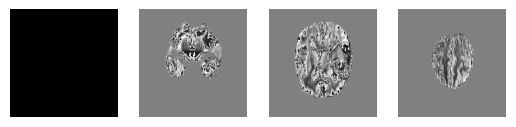

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4)

for i in range(4):
  img = vol[i*40, :, :]
  axes[i].imshow(img, cmap="gray")
  axes[i].axis("off")

plt.show()